In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as  yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start=datetime(now.year-10,now.month,now.day)
end=now
ticker='AAPL'
df=yf.download(ticker,start,end)
df

C:\Users\DIGANTA\AppData\Local\Temp\ipykernel_24700\2773137143.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400
2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200
2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000
2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000
...,...,...,...,...,...
2025-08-01,202.380005,213.580002,201.500000,210.869995,104434500
2025-08-04,203.350006,207.880005,201.679993,204.509995,75109300


# 2.Data Exploration & Visualization

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.224688,106.283228,104.059394,105.125983,1.080984e+08
std,69.293494,69.975989,68.533064,69.221760,6.291927e+07
min,20.647457,20.951435,20.448617,20.569752,2.323470e+07
25%,39.739787,40.252620,39.407362,39.880021,6.581810e+07
50%,105.640888,107.529690,103.643838,105.384686,9.328520e+07
75%,166.054245,168.039693,164.670212,166.259038,1.310532e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400
2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200
2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000
2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000


In [7]:
df=df.reset_index()

In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400
1,2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200
2,2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000
3,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200
4,2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000


Text(0, 0.5, 'Close Price')

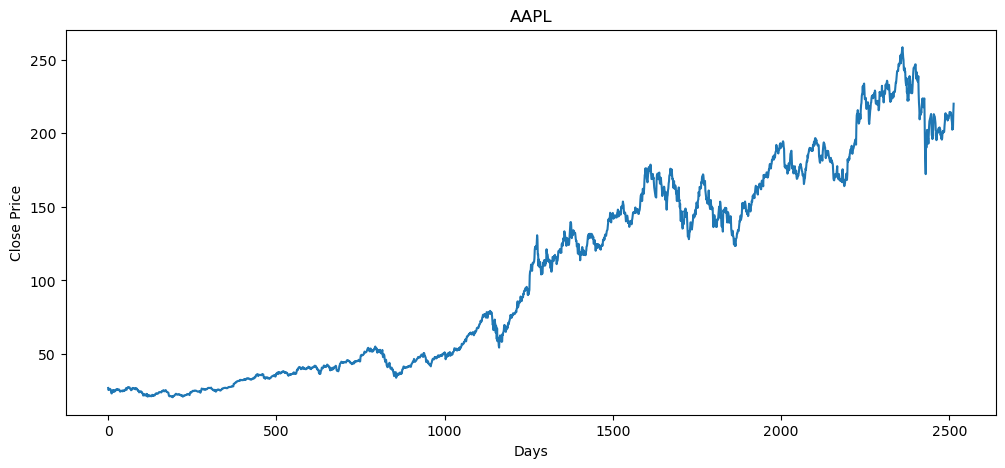

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3.Feature Engineering

### 100 days Moving Average

In [10]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400,NaN
1,2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200,NaN
2,2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000,NaN
3,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN
4,2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000,NaN


In [11]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400,NaN
1,2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200,NaN
2,2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000,NaN
3,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN
4,2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000,NaN
...,...,...,...,...,...,...,...
98,2015-12-29,24.569115,24.725016,24.144341,24.166935,123724800,NaN
99,2015-12-30,24.248274,24.560075,24.216642,24.532963,100855200,25.646510
100,2015-12-31,23.782825,24.182745,23.683410,24.178227,163649200,25.614992


Text(0, 0.5, 'Price')

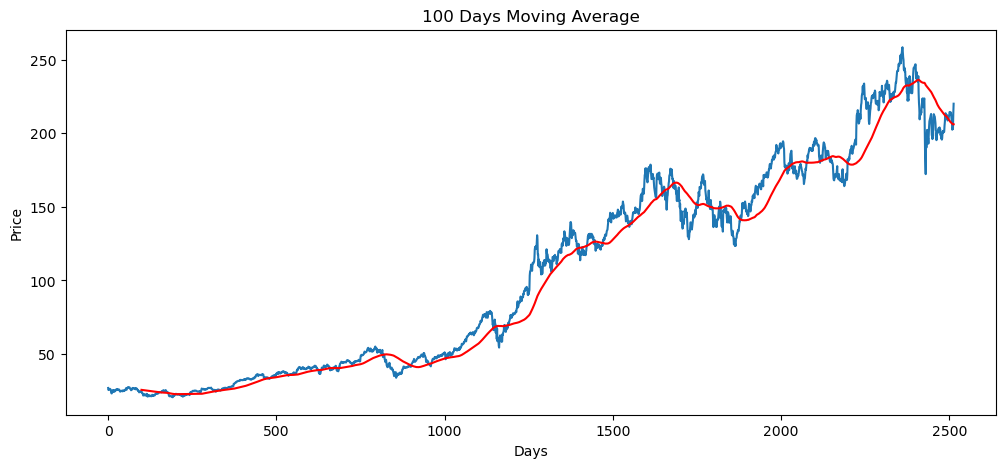

In [12]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 days Moving Average

In [13]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-10,26.934677,26.995421,26.216988,26.216988,219806400,NaN,NaN
1,2015-08-11,25.533051,26.588210,25.497055,26.504967,388331200,NaN,NaN
2,2015-08-12,25.926764,25.967260,24.664622,25.317066,404870000,NaN,NaN
3,2015-08-13,25.906519,26.187745,25.769281,26.106752,194143200,NaN,NaN
4,2015-08-14,26.088749,26.167492,25.650037,25.719781,171718000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-05-23,22.039339,22.213040,21.865639,21.911350,152074400,22.771457,NaN
199,2016-05-24,22.375320,22.418744,22.133053,22.219904,140560800,22.752727,24.199619
200,2016-05-25,22.768429,22.795854,22.423314,22.551303,152675200,22.742583,24.178787


Text(0, 0.5, 'Price')

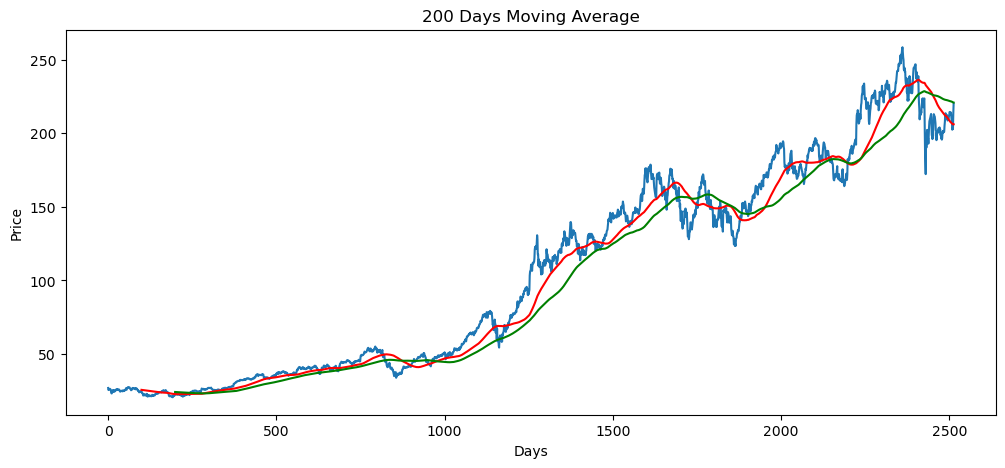

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### Calculatinng % changed in each trading session

In [15]:
df['Percentage Changed']=df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,26.934677,NaN
1,25.533051,-0.052038
2,25.926764,0.015420
3,25.906519,-0.000781
4,26.088749,0.007034
...,...,...
2509,202.380005,-0.025004
2510,203.350006,0.004793
2511,202.919998,-0.002115


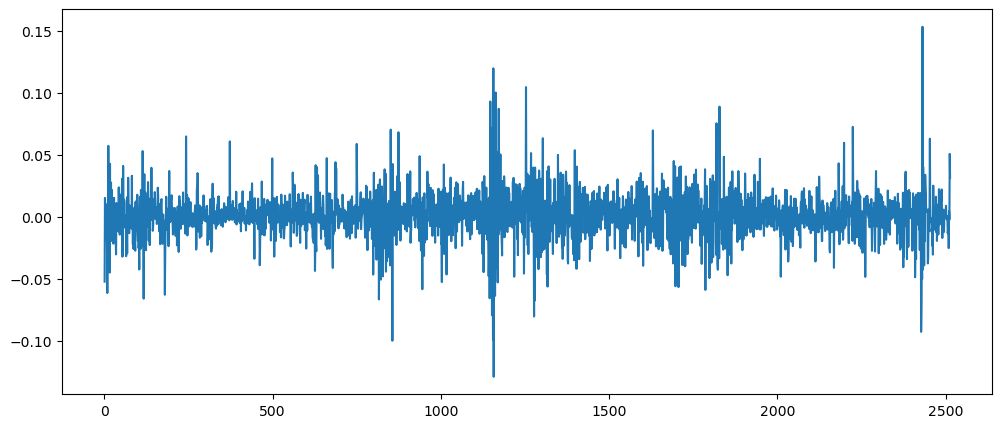

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4.Data Preprocessing

In [17]:
df.shape

(2514, 9)

In [18]:
# spliting data into Training & Testing datasets
data_training=pd.DataFrame(df.Close[0:int (len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int (len(df)*0.7):int (len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        26.934677
1        25.533051
2        25.926764
3        25.906519
4        26.088749
...            ...
1754    154.865448
1755    159.943954
1756    158.959763
1757    157.483414
1758    163.506821

[1759 rows x 1 columns]
Ticker        AAPL
1759    163.191849
1760    162.965210
1761    162.492081
1762    162.541367
1763    166.799072
...            ...
2509    202.380005
2510    203.350006
2511    202.919998
2512    213.250000
2513    220.029999

[755 rows x 1 columns]


In [19]:
# Scalig down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03979298],
       [0.03092183],
       [0.03341371],
       ...,
       [0.87540429],
       [0.86606021],
       [0.90418347]], shape=(1759, 1))

In [21]:
type(data_training_array)

numpy.ndarray

In [22]:
data_training_array.shape

(1759, 1)

# 5.Sequence Creation

In [23]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [24]:
x_train

array([[[0.03979298],
        [0.03092183],
        [0.03341371],
        ...,
        [0.02207519],
        [0.0248209 ],
        [0.02279024]],

       [[0.03092183],
        [0.03341371],
        [0.03328558],
        ...,
        [0.0248209 ],
        [0.02279024],
        [0.01984433]],

       [[0.03341371],
        [0.03328558],
        [0.03443895],
        ...,
        [0.02279024],
        [0.01984433],
        [0.01997305]],

       ...,

       [[0.84861236],
        [0.88288524],
        [0.85533016],
        ...,
        [0.8460022 ],
        [0.84949062],
        [0.88163343]],

       [[0.88288524],
        [0.85533016],
        [0.83175574],
        ...,
        [0.84949062],
        [0.88163343],
        [0.87540429]],

       [[0.85533016],
        [0.83175574],
        [0.80619109],
        ...,
        [0.88163343],
        [0.87540429],
        [0.86606021]]], shape=(1659, 100, 1))

In [25]:
y_train

array([0.01984433, 0.01997305, 0.01619773, ..., 0.87540429, 0.86606021,
       0.90418347], shape=(1659,))

In [26]:
x_train.ndim

3

In [27]:
y_train.ndim

1

# 6.Model Building

In [31]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [32]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [33]:
model=Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7.Model Training

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0138
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 5.2427e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 5.3023e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 5.0701e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.7878e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.3723e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.3287e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.1462e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.4437e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.3594e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 4.2068e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 3.6836e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.9354e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.5528e-04
Epoch 15/50
52/52 ━

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [36]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8.Preparing Test Data

In [37]:
data_testing

Ticker,AAPL
1759,163.191849
1760,162.965210
1761,162.492081
1762,162.541367
1763,166.799072
...,...
2509,202.380005
2510,203.350006
2511,202.919998
2512,213.250000


In [38]:
past_100_days=data_training.tail(100)

In [39]:
past_100_days

Ticker,AAPL
1659,152.063370
1660,148.024200
1661,152.417175
1662,156.839630
1663,157.851898
...,...
1754,154.865448
1755,159.943954
1756,158.959763
1757,157.483414


In [40]:
final_df=pd.concat([past_100_days,data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,152.063370
1,148.024200
2,152.417175
3,156.839630
4,157.851898
...,...
850,202.380005
851,203.350006
852,202.919998
853,213.250000


In [41]:
input_data=scaler.fit_transform(final_df)
input_data

array([[2.12202450e-01],
       [1.82277226e-01],
       [2.14823709e-01],
       [2.47588601e-01],
       [2.55088249e-01],
       [2.79552205e-01],
       [2.89746029e-01],
       [3.14792977e-01],
       [3.24913997e-01],
       [3.53018798e-01],
       [3.57751467e-01],
       [3.64158952e-01],
       [3.88623133e-01],
       [3.79958632e-01],
       [3.56950517e-01],
       [3.54766191e-01],
       [3.84837021e-01],
       [3.60226667e-01],
       [3.36708929e-01],
       [3.38966058e-01],
       [3.24039905e-01],
       [2.92440204e-01],
       [3.06346772e-01],
       [3.26297147e-01],
       [2.89090799e-01],
       [2.87489012e-01],
       [3.04453998e-01],
       [3.03215776e-01],
       [2.97318367e-01],
       [2.63606805e-01],
       [2.71543612e-01],
       [2.27274549e-01],
       [2.25599959e-01],
       [2.77077118e-01],
       [2.33463285e-01],
       [2.35720527e-01],
       [2.46787765e-01],
       [2.94406008e-01],
       [2.27056252e-01],
       [2.32451838e-01],


In [42]:
input_data.shape

(855, 1)

In [43]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [44]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [45]:
x_test

array([[[0.21220245],
        [0.18227723],
        [0.21482371],
        ...,
        [0.26329615],
        [0.25235824],
        [0.2969842 ]],

       [[0.18227723],
        [0.21482371],
        [0.2475886 ],
        ...,
        [0.25235824],
        [0.2969842 ],
        [0.29465064]],

       [[0.21482371],
        [0.2475886 ],
        [0.25508825],
        ...,
        [0.2969842 ],
        [0.29465064],
        [0.29297153]],

       ...,

       [[0.69104864],
        [0.63703558],
        [0.66522607],
        ...,
        [0.62343763],
        [0.58498617],
        [0.59217267]],

       [[0.63703558],
        [0.66522607],
        [0.66899952],
        ...,
        [0.58498617],
        [0.59217267],
        [0.58898684]],

       [[0.66522607],
        [0.66899952],
        [0.65930673],
        ...,
        [0.59217267],
        [0.58898684],
        [0.66551932]]], shape=(755, 100, 1))

In [47]:
x_test[0].shape

(100, 1)

# 9.Making Predictions

In [48]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [49]:
y_predicted

array([[0.26986888],
       [0.28182188],
       [0.2881586 ],
       [0.28939223],
       [0.28889045],
       [0.2995565 ],
       [0.3072943 ],
       [0.32152602],
       [0.3352048 ],
       [0.34321675],
       [0.35097754],
       [0.35438457],
       [0.34789065],
       [0.33050135],
       [0.31620684],
       [0.308828  ],
       [0.31288964],
       [0.3013906 ],
       [0.28476262],
       [0.26644152],
       [0.24993977],
       [0.24147342],
       [0.23278332],
       [0.22398113],
       [0.22148852],
       [0.21785308],
       [0.22209503],
       [0.24201183],
       [0.2357014 ],
       [0.2281388 ],
       [0.2152539 ],
       [0.20124319],
       [0.20032512],
       [0.2092046 ],
       [0.21060096],
       [0.20728356],
       [0.1982446 ],
       [0.1913011 ],
       [0.18940789],
       [0.1851731 ],
       [0.16517776],
       [0.13804352],
       [0.12592538],
       [0.12951961],
       [0.13776717],
       [0.14303294],
       [0.1342804 ],
       [0.124

In [50]:
y_test

array([2.94650645e-01, 2.92971533e-01, 2.89466233e-01, 2.89831381e-01,
       3.21375687e-01, 3.15899497e-01, 3.42259166e-01, 3.50218243e-01,
       3.49049885e-01, 3.60148890e-01, 3.57227938e-01, 3.38024137e-01,
       3.09181467e-01, 3.06698693e-01, 3.08889576e-01, 3.27144221e-01,
       2.80339024e-01, 2.63982918e-01, 2.45947135e-01, 2.33606856e-01,
       2.39010243e-01, 2.23311289e-01, 2.13964765e-01, 2.24406504e-01,
       2.13453785e-01, 2.34702072e-01, 2.78951465e-01, 2.08926299e-01,
       2.19660383e-01, 1.98192442e-01, 1.85998562e-01, 2.13599731e-01,
       2.31270367e-01, 2.08050172e-01, 2.00894305e-01, 1.84026993e-01,
       1.86509655e-01, 1.93738438e-01, 1.79718709e-01, 1.25976959e-01,
       9.47248839e-02, 1.25757758e-01, 1.52409771e-01, 1.54600314e-01,
       1.47517364e-01, 1.08525299e-01, 1.10934818e-01, 1.00420162e-01,
       9.57470699e-02, 1.29700782e-01, 9.60391876e-02, 1.25465753e-01,
       1.35250115e-01, 1.36053665e-01, 1.32621507e-01, 1.60952971e-01,
      

In [51]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [52]:
y_predicted

array([159.84691 , 161.46028 , 162.31558 , 162.48209 , 162.41437 ,
       163.85402 , 164.89844 , 166.81937 , 168.66566 , 169.74709 ,
       170.79459 , 171.25446 , 170.37793 , 168.0308  , 166.1014  ,
       165.10544 , 165.65367 , 164.10158 , 161.85721 , 159.38432 ,
       157.15698 , 156.01424 , 154.84128 , 153.6532  , 153.31676 ,
       152.82607 , 153.39862 , 156.0869  , 155.23515 , 154.21439 ,
       152.47525 , 150.58414 , 150.46022 , 151.65872 , 151.84721 ,
       151.39944 , 150.1794  , 149.2422  , 148.98666 , 148.41508 ,
       145.7162  , 142.05374 , 140.41809 , 140.90321 , 142.01643 ,
       142.72719 , 141.5458  , 140.23549 , 138.84163 , 137.64378 ,
       138.136   , 137.73723 , 138.30582 , 139.39207 , 140.36365 ,
       140.8773  , 142.2215  , 144.0694  , 146.40414 , 147.23975 ,
       145.98474 , 147.8553  , 149.30273 , 149.35648 , 147.26938 ,
       143.44911 , 140.26123 , 138.34981 , 137.553   , 136.0855  ,
       138.13438 , 141.60693 , 144.11984 , 146.09383 , 146.868

In [53]:
y_test

array([163.19184875, 162.96520996, 162.49208069, 162.54136658,
       166.79907227, 166.05992126, 169.61782837, 170.69210815,
       170.53440857, 172.03250122, 171.63824463, 169.04620361,
       165.15315247, 164.81803894, 165.11375427, 167.5776825 ,
       161.26013184, 159.05245972, 156.61807251, 154.95243835,
       155.6817627 , 153.56278992, 152.30123901, 153.71061707,
       152.23226929, 155.1002655 , 161.07284546, 151.62117004,
       153.07000732, 150.17236328, 148.52648926, 152.25196838,
       154.6370697 , 151.50291443, 150.53704834, 148.26037598,
       148.59547424, 149.57118225, 147.67886353, 140.42504883,
       136.20678711, 140.39546204, 143.99282837, 144.28849792,
       143.33247375, 138.06950378, 138.39472961, 136.97550964,
       136.34475708, 140.92767334, 136.38418579, 140.35604858,
       141.67669678, 141.78515625, 141.32189941, 145.14595032,
       147.29449463, 150.14283752, 147.19596863, 142.71156311,
       153.49377441, 151.12838745, 148.47717285, 142.93

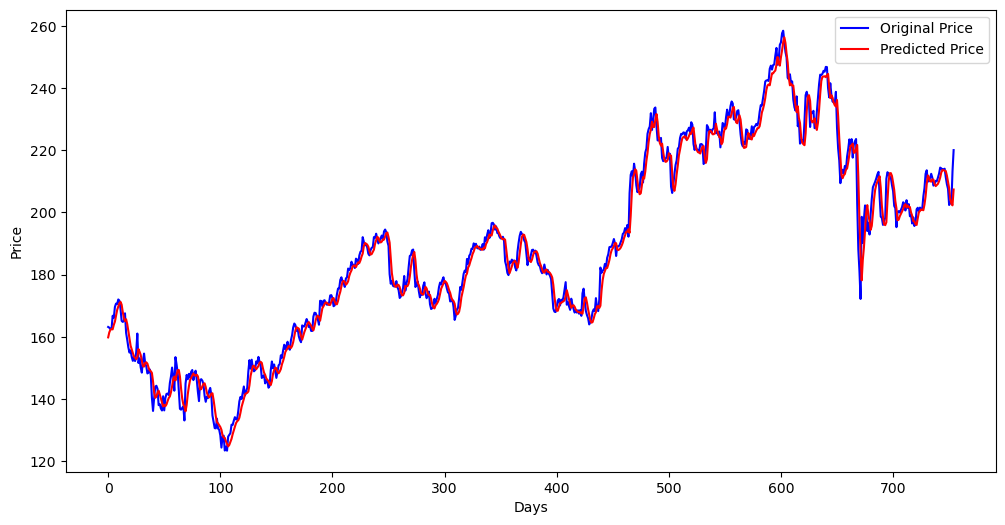

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 200.0)

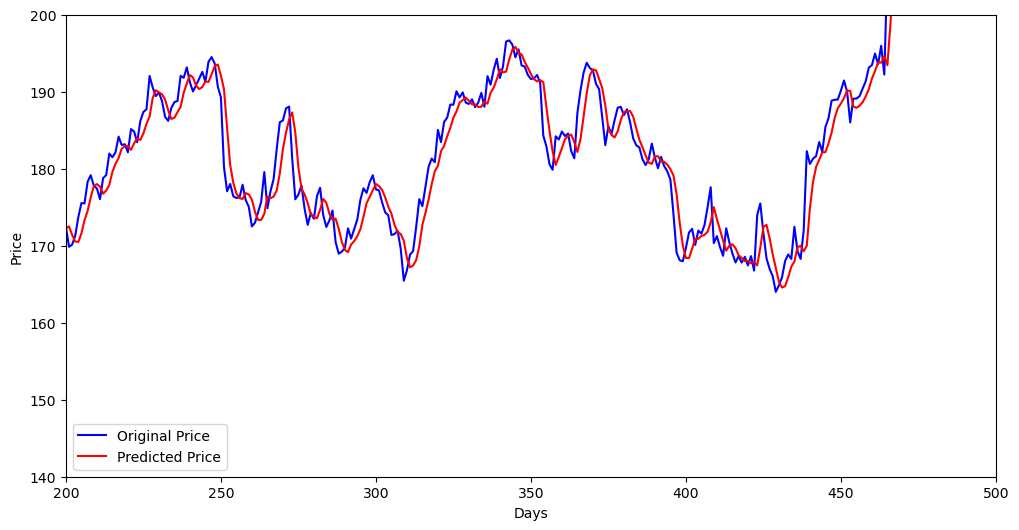

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(200,500)
plt.ylim(140,200)

# 10.Model Evaluation

In [62]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mse= mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.192434885695157


In [61]:
# Root Mean Squared Error (RMSE)
rmse =np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.89774741173606


In [63]:
# R-Squared
r2=r2_score(y_test,y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9842689253967654
